## Bank Personal Loan Model:
here we are going to prepare a model that tell if a person fulfills the requirements to get personal loan depending on their data.

In [278]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [279]:
df = pd.read_csv('Bank_Personal_Loan_Modelling (1).csv')

In [280]:
rows, columns = df.shape
print('No of rows are:', rows)
print('No of columns are:', columns)

No of rows are: 5000
No of columns are: 14


In [281]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [282]:
df.describe(include = 'all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [283]:
# another way to describe is in tabluar form
df.describe().T   #here we can see there is -3 min value for experience which is not possible. We have to handle it.

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [284]:
df.isnull().sum()
 # or
df.isnull().values.any()

False

<AxesSubplot:>

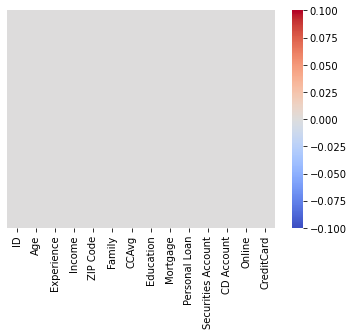

In [285]:
# we can also use visualization to find missing values.
sns.heatmap(df.isnull(),yticklabels = False, cmap = 'coolwarm')  #shows no missing values

In [286]:
#our target or dependent variable is Personal Loan column. which shows whether customer has taken loan or not.
#we can shift this column to end of tabel for convenience.

PL = df['Personal Loan']    #we give temporary name to this column.

df.drop('Personal Loan', axis = 1, inplace = True) #we drop temporarily this column.
df['Personal Loan'] = PL                           # we add again this column at end of table.

df.head(1)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0


In [287]:
df.drop(['ID','ZIP Code','Online','Experience'], axis = 1, inplace = True)
df.head(1)

#Id, zipccode and online(whether customer uses online service) are not important
#we also dropped Experience coz there is a strong correlation (almost same values) for Age and Experience. So Age is enough

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,CreditCard,Personal Loan
0,25,49,4,1.6,1,0,1,0,0,0


### Modeling

In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = df.drop('Personal Loan', axis = 1)
y = df['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.70)

In [289]:
model = LogisticRegression(solver = 'newton-cg')
model.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [290]:
model.score(x_train, y_train)

0.9542857142857143

In [291]:
model.score(x_test, y_test)

0.9453333333333334

### confusion matrix

<AxesSubplot:>

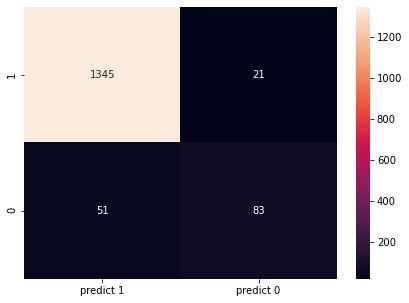

In [292]:
from sklearn import metrics

y_predict = model.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                    columns = [i for i in ['predict 1', 'predict 0']])
plt.figure(figsize = (7,5))

sns.heatmap(loan_cm, annot = True, fmt = 'g')

to get more analysis and knowledge and better data handeling techniques, use kaggle:
https://www.kaggle.com/pritech/bank-personal-loan-modelling